In [1]:
# Python ≥3.5 is required (taken from ml handson github)
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.linear_model import LogisticRegression


In [ ]:
# Load the dataset
dataframe = pd.read_csv("ai4i2020.csv")

df_cleaned = dataframe.drop(["Type","Product ID", "TWF", "HDF", "OSF","PWF", "RNF", "UDI"], axis=1)

# Counting the amount of zeros and ones
MF_counts = df_cleaned['Machine failure'].value_counts()

print(dataframe) 
print("Amount of machine failures and non failures", MF_counts)

        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure

In [ ]:
# Checking the different informations in the dataframe
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 468.9 KB


In [ ]:
# Checks the first 5 rows since no specific number is chosen. 
df_cleaned.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


In [ ]:
# Provides amount of data points, mean value, standard deviation, minimum value, maximum value.
df_cleaned.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


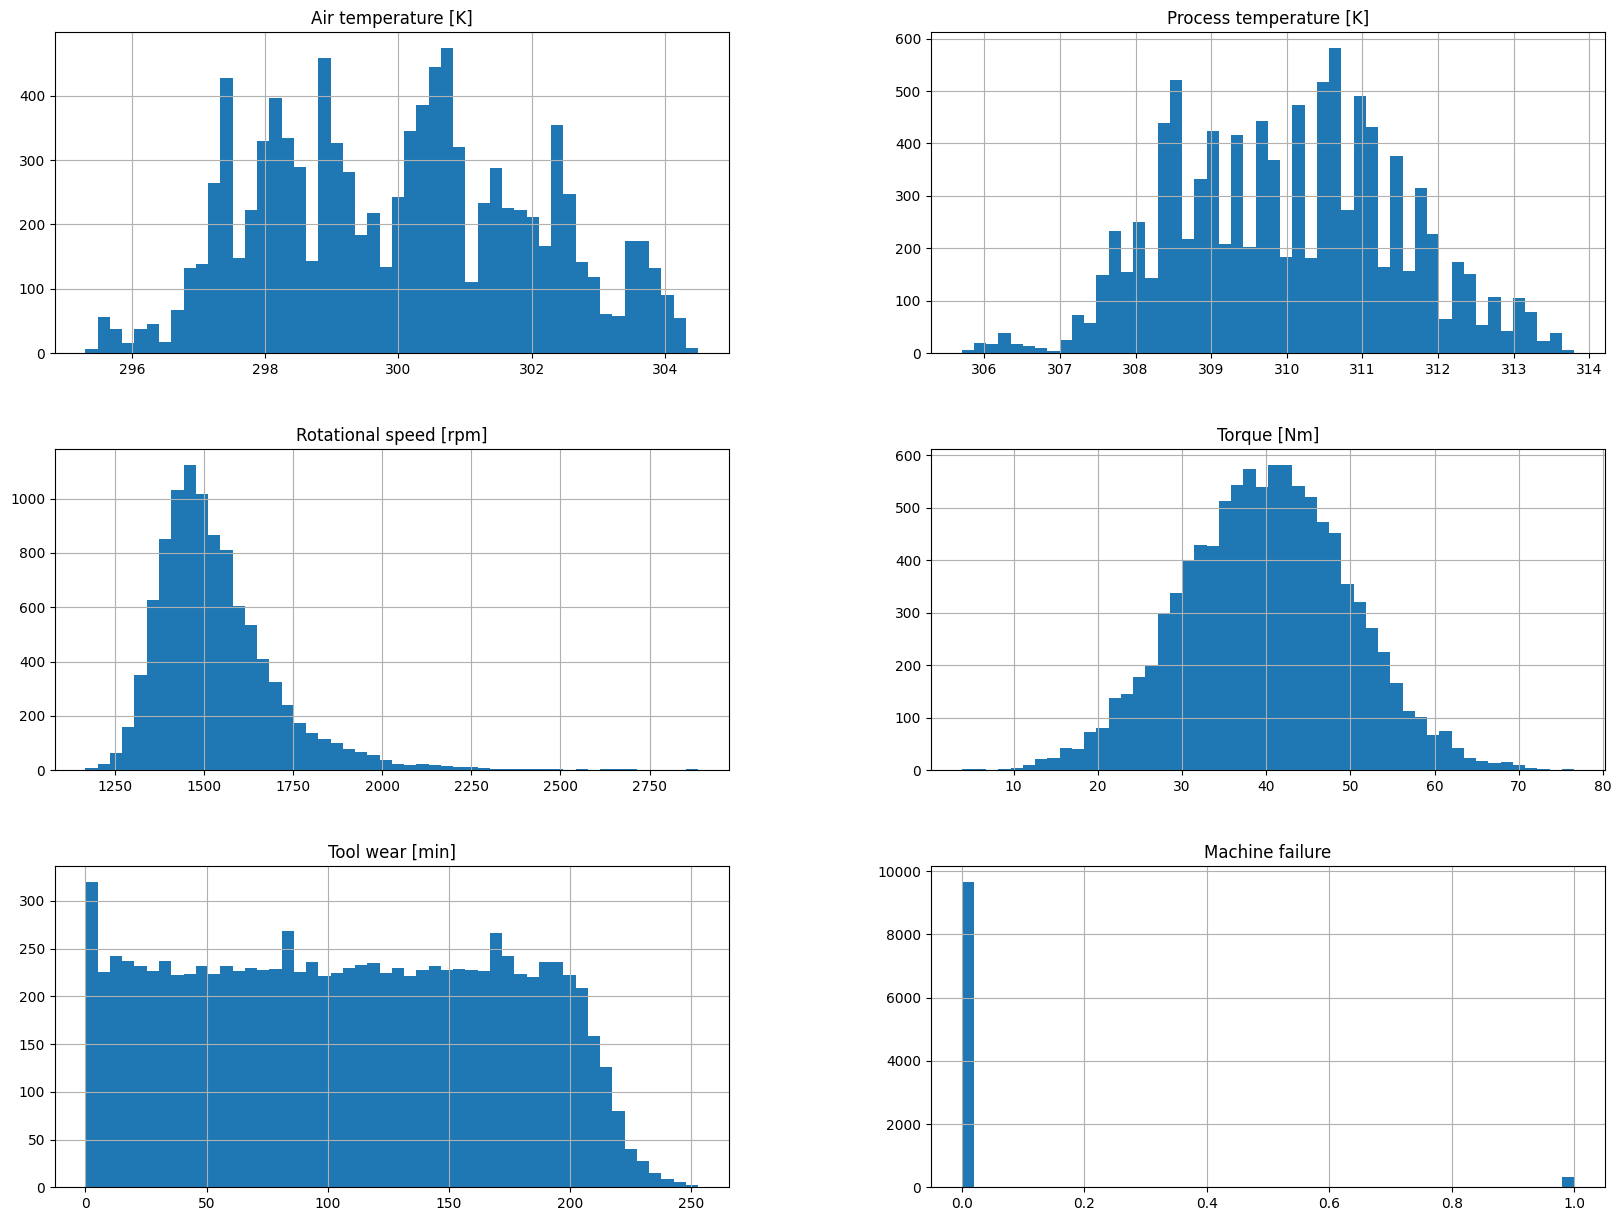

In [6]:
df_cleaned.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
np.random.seed(22)

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


train_set, test_set = split_train_test(df_cleaned, 0.2)


len(train_set)

8000

In [8]:
len(test_set)

2000

Be aware this approach is based on randomized seeding and can vary if new data is added. Another approach could be to use identifiers instead of randomizing from a seed

To ensure that the target variabl values are distributed percentage wise evenly between both sets, the sets are stratified

In [9]:
# Initialize stratified shuffle split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform stratified split
for train_index, test_index in split.split(df_cleaned, df_cleaned["Machine failure"]):
    strat_train_set = df_cleaned.loc[train_index]
    strat_test_set = df_cleaned.loc[test_index]

# Check class proportions in training and test sets
print(strat_train_set["Machine failure"].value_counts(normalize=True))
print(strat_test_set["Machine failure"].value_counts(normalize=True))

Machine failure
0    0.966125
1    0.033875
Name: proportion, dtype: float64
Machine failure
0    0.966
1    0.034
Name: proportion, dtype: float64


In [10]:
corr_matrix = df_cleaned.corr()

In [11]:
corr_matrix["Machine failure"].sort_values(ascending=False)  #Choose target variable and find correlation from other features

Machine failure            1.000000
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64

array([[<Axes: xlabel='Machine failure', ylabel='Machine failure'>,
        <Axes: xlabel='Torque [Nm]', ylabel='Machine failure'>,
        <Axes: xlabel='Tool wear [min]', ylabel='Machine failure'>,
        <Axes: xlabel='Air temperature [K]', ylabel='Machine failure'>],
       [<Axes: xlabel='Machine failure', ylabel='Torque [Nm]'>,
        <Axes: xlabel='Torque [Nm]', ylabel='Torque [Nm]'>,
        <Axes: xlabel='Tool wear [min]', ylabel='Torque [Nm]'>,
        <Axes: xlabel='Air temperature [K]', ylabel='Torque [Nm]'>],
       [<Axes: xlabel='Machine failure', ylabel='Tool wear [min]'>,
        <Axes: xlabel='Torque [Nm]', ylabel='Tool wear [min]'>,
        <Axes: xlabel='Tool wear [min]', ylabel='Tool wear [min]'>,
        <Axes: xlabel='Air temperature [K]', ylabel='Tool wear [min]'>],
       [<Axes: xlabel='Machine failure', ylabel='Air temperature [K]'>,
        <Axes: xlabel='Torque [Nm]', ylabel='Air temperature [K]'>,
        <Axes: xlabel='Tool wear [min]', ylabel='Air temp

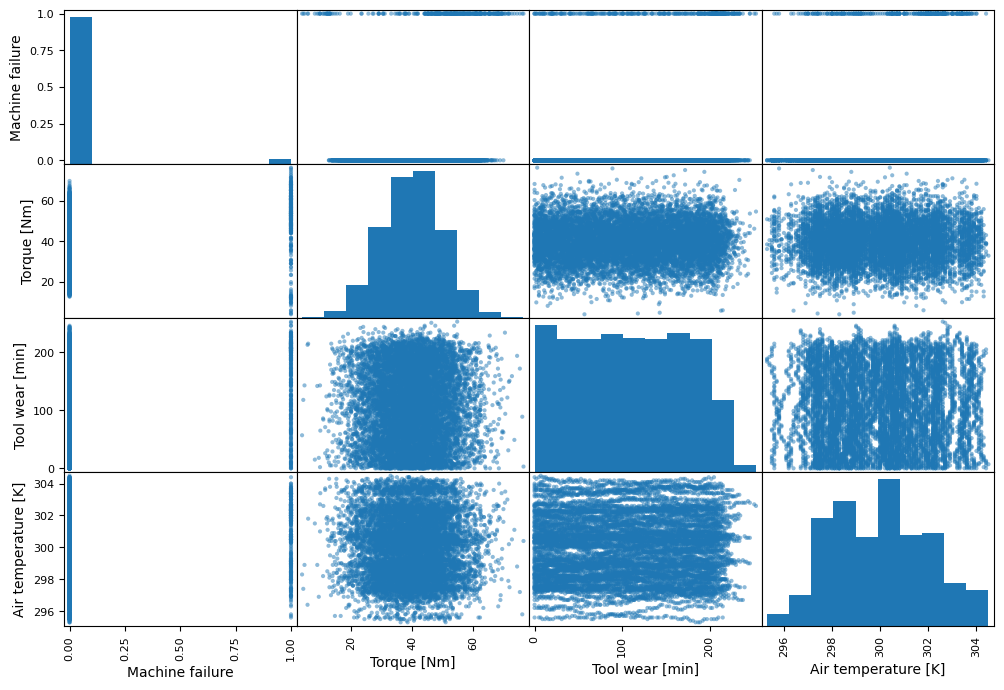

In [12]:
attributes = ["Machine failure", "Torque [Nm]", "Tool wear [min]",
              "Air temperature [K]"]
scatter_matrix(df_cleaned[attributes], figsize=(12, 8))


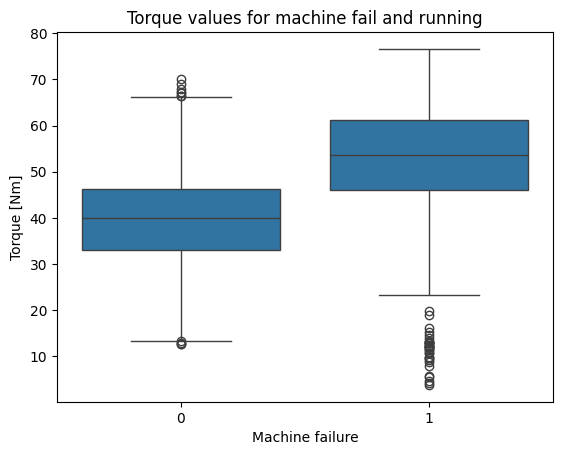

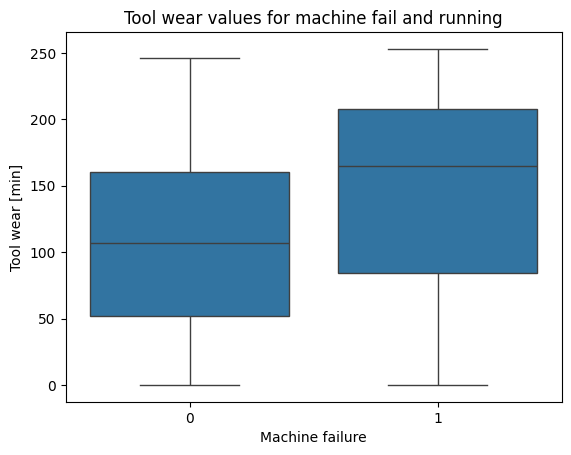

In [13]:

# Boxplot for Torque by Machine failure
sns.boxplot(x='Machine failure', y='Torque [Nm]', data=df_cleaned)
plt.title('Torque values for machine fail and running')
plt.show()

# Boxplot for Tool wear by Machine failure
sns.boxplot(x='Machine failure', y='Tool wear [min]', data=df_cleaned)
plt.title('Tool wear values for machine fail and running')
plt.show()

In [14]:
df_cleaned["airtemp_per_rotations"] = df_cleaned["Air temperature [K]"]/df_cleaned["Rotational speed [rpm]"]
df_cleaned["Torque_times_toolwear"] = df_cleaned["Torque [Nm]"]*df_cleaned["Tool wear [min]"]

In [15]:
corr_matrix = df_cleaned.corr() #updating the correlation matrix with the new constructed features
corr_matrix["Machine failure"].sort_values(ascending=False)

Machine failure            1.000000
Torque [Nm]                0.191321
Torque_times_toolwear      0.190427
airtemp_per_rotations      0.116867
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64

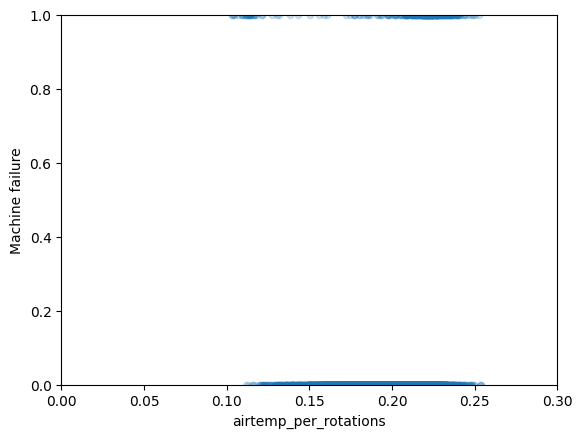

In [16]:
df_cleaned.plot(kind="scatter", x="airtemp_per_rotations", y="Machine failure",
             alpha=0.2)
plt.axis([0, 0.3, 0, 1])
plt.show()

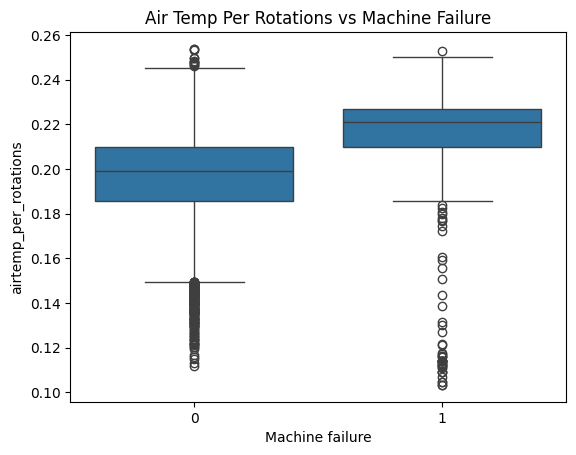

In [ ]:
sns.boxplot(x='Machine failure', y='airtemp_per_rotations', data=df_cleaned)
plt.title('Air Temp Per Rotations vs Machine Failure')
plt.show()

We have to separate our training set in a feature Matrix X and a label vector y. This has to do with the input the machine learning training process requires

In [18]:
df_X = strat_train_set.drop("Machine failure", axis=1) # drop labels for training set

df_y = strat_train_set["Machine failure"].copy()

In [19]:
print(df_X)

      Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
4058                302.0                    310.9                    1456   
1221                297.0                    308.3                    1399   
6895                301.0                    311.6                    1357   
9863                298.9                    309.8                    1411   
8711                297.1                    308.5                    1733   
...                   ...                      ...                     ...   
980                 296.1                    306.7                    1409   
4266                302.7                    311.1                    1440   
7772                300.3                    311.5                    1464   
5780                301.7                    311.2                    1517   
1424                298.7                    309.7                    1462   

      Torque [Nm]  Tool wear [min]  
4058         47.2         

In [20]:
df_y.describe()

count    8000.000000
mean        0.033875
std         0.180919
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Machine failure, dtype: float64

In [21]:
# Separate the feature matrix and labels for the test set
X_test = strat_test_set.drop("Machine failure", axis=1)  # Drop the target column
y_test = strat_test_set["Machine failure"].copy()       # Copy the target column

In [22]:
# Initialize the Random Forest Regressor
forest_clsf  = RandomForestClassifier(n_estimators=100, random_state=42)


In [23]:
forest_clsf.fit(df_X, df_y)


RandomForestClassifier(random_state=42)

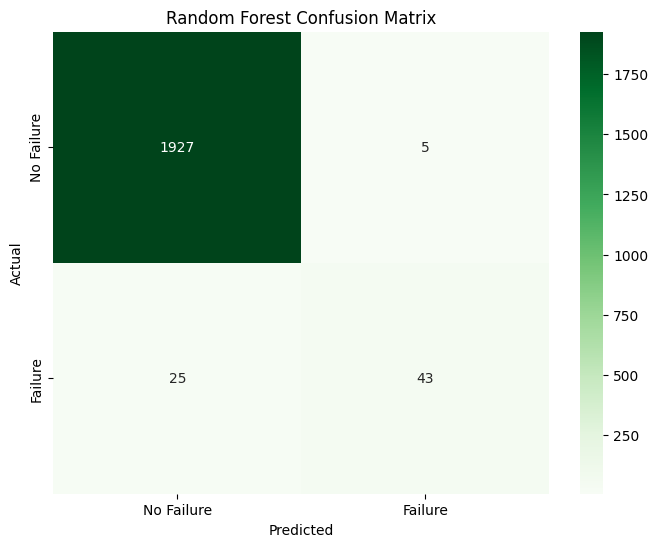

In [24]:
# Generate predictions on the test set
y_pred_rf = forest_clsf.predict(X_test)

# Create the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)


# Calculate precision
precision = precision_score(y_test, y_pred_rf)

# Calculate recall
recall = recall_score(y_test, y_pred_rf)



# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.98
Precision: 0.90
Recall: 0.63


In [26]:
#Fbeta_score allows for putting different weights on the parameters in the F1-score formula. We want highest weight on recall as compared to precision which is given by beta=2
# Calculate the F2-Score

f2 = fbeta_score(y_test, y_pred_rf, beta=2)

print(f"F2-Score: {f2:.2f}")


F2-Score: 0.67


In [27]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(df_X, df_y)


LogisticRegression(max_iter=1000, random_state=42)

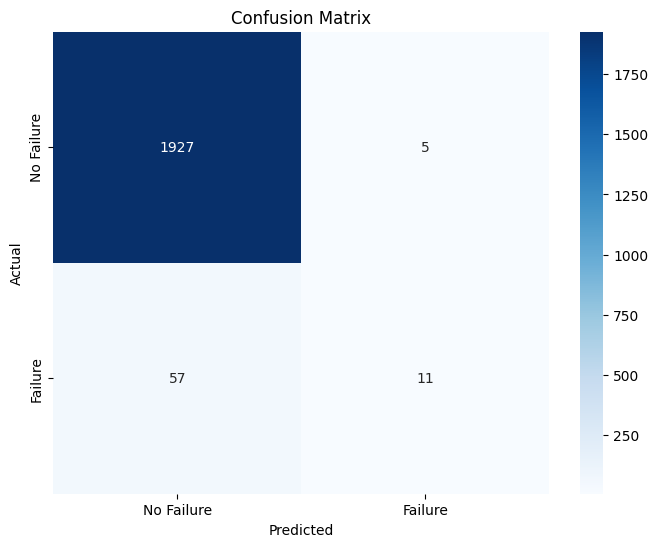

In [29]:
# Predict labels for the test set
y_pred_log = log_reg.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [30]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log)


# Calculate precision
precision = precision_score(y_test, y_pred_log)

# Calculate recall
recall = recall_score(y_test, y_pred_log)



# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.97
Precision: 0.69
Recall: 0.16


In [31]:
f2 = fbeta_score(y_test, y_pred_log, beta=2)

print(f"F2-Score: {f2:.2f}")


F2-Score: 0.19
